D:\gejun\Documents\Git\YuEbaoPrediction\LSTM_prediction


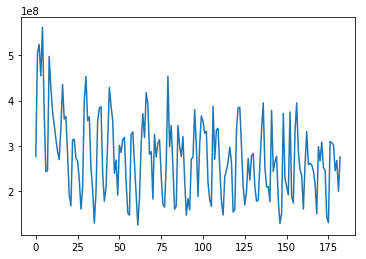

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 8)                 512       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100


Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100


Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100


Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100


Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100


Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100


Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100


Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100


Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100


Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100


Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100


Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100


Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100


Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100


Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100


Epoch 100/100


err: 0.218441788794
Train Score: 60540018.00 RMSE
Test Score: 61799281.36 RMSE


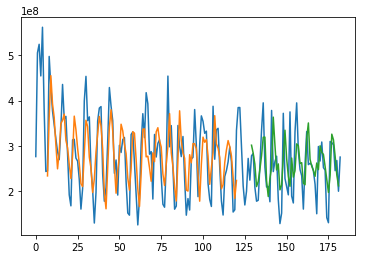

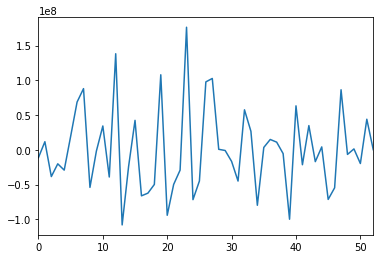

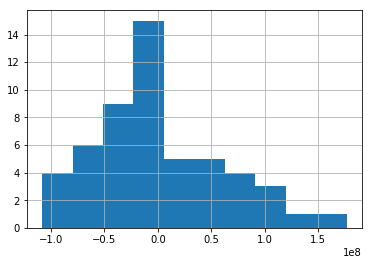

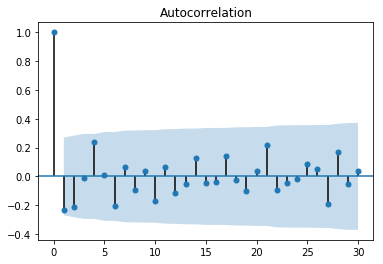

(array([  2.96277991,   5.57486603,   5.58424604,   8.88616965,
          8.89689753,  11.51008126,  11.76568709,  12.33877125,
         12.42428401,  14.46347064,  14.79240846,  15.78475696,
         15.98215403,  17.20265979]),
 array([ 0.08520134,  0.06157908,  0.13368571,  0.06400853,  0.11324791,
         0.07383434,  0.10853248,  0.13671669,  0.1904329 ,  0.15288125,
         0.1921992 ,  0.20129468,  0.25009487,  0.2455389 ]),
 array([  2.80117374,   5.22328995,   5.23181723,   8.173531  ,
          8.18289351,  10.41597779,  10.62975721,  11.09864425,
         11.16705446,  12.76132764,  13.01251652,  13.75226722,
         13.89582873,  14.76127827]),
 array([ 0.09419533,  0.07341368,  0.15558836,  0.08542441,  0.14643989,
         0.10819227,  0.15560399,  0.19617229,  0.26443184,  0.2373241 ,
         0.29250812,  0.31680707,  0.38122098,  0.3946656 ]))

In [12]:
%cd D:\\gejun\\Documents\\Git\\YuEbaoPrediction\\LSTM_prediction

'''
申购的lstm
'''
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras.models
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from statsmodels.tsa.stattools import acf, pacf



import pandas as pd
from sklearn.externals import joblib
import os
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

dataframe = read_csv('../file/group_by_date.csv', usecols=[3], engine='python')
dataframe = dataframe[244:]
dataset = dataframe.values
dataset = dataset.astype('float64')
plt.plot(dataset)
plt.show()

# fix random seed for reproducibility
np.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
myfile = os.path.exists("lstm.model")
if myfile:
    print("ssss")
else:
    model_prob = model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=10)
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

errs = mape(testY[0],testPredict[:,0])
print("err:",errs)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainData = pd.DataFrame({'trainpredict':trainPredict[:,0],'actual':trainY[0]})
testData = pd.DataFrame({'testpredict':testPredict[:,0],'actual':testY[0]})
trainData.to_csv("../file/3_8_purchase_train.csv")
testData.to_csv("../file/3_8_purchase_test.csv")
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

test_df = read_csv('../file/3_8_purchase_test.csv', engine='python')
residual = test_df['actual'] - test_df['testpredict']
residual.describe()
mean = residual.mean()
mean_test_predict = test_df['testpredict'] + mean
mean_residual = test_df['actual'] - mean_test_predict
mean_residual.describe()

%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
mean_residual.plot()
plt.show()

# 直方图 是否正态分布
mean_residual.hist()
plt.show()

# autocorrelation
plot_acf(mean_residual, ax=plt.gca(), lags=30)
plt.show()

# LBQ 检验
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(mean_residual, lags=14, boxpierce=True)

